<a href="https://colab.research.google.com/github/YonWaiHung/MLPC_IndivAssignment/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pandas
import numpy as numpy
import statsmodels.api as statmod
import scipy.stats as scipy
import matplotlib.pyplot as pyplot
import seaborn as seaborn
import matplotlib.mlab as mlab
%matplotlib inline

Data Understanding

In [ ]:
#Read dataset
heart_df = pandas.read_csv("processed.cleveland.csv")
heart_df.head(20)

,age,sex,cp,restbps,chol,fbs,rester,maxhr,eia,oldpeak,slope,majves,thal,condition
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
7,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1
8,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
9,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1


In [ ]:
#Rename column sex to sex_male
heart_df.rename(columns={'sex':'sex_male'},inplace=True)
heart_df.head()

,age,sex_male,cp,restbps,chol,fbs,rester,maxhr,eia,oldpeak,slope,majves,thal,condition
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0


Data Preparation
- Data Wrangling

In [ ]:
# Identify the attributes that contain missing values
heart_df.replace('?', numpy.nan, inplace=True)
missing_values = heart_df.isnull()
for i in missing_values.columns.values.tolist():
    print (i)
    print (missing_values[i].value_counts())
    print ('')

age
False    303
Name: age, dtype: int64

sex_male
False    303
Name: sex_male, dtype: int64

cp
False    303
Name: cp, dtype: int64

restbps
False    303
Name: restbps, dtype: int64

chol
False    303
Name: chol, dtype: int64

fbs
False    303
Name: fbs, dtype: int64

rester
False    303
Name: rester, dtype: int64

maxhr
False    303
Name: maxhr, dtype: int64

eia
False    303
Name: eia, dtype: int64

oldpeak
False    303
Name: oldpeak, dtype: int64

slope
False    303
Name: slope, dtype: int64

majves
False    299
True       4
Name: majves, dtype: int64

thal
False    301
True       2
Name: thal, dtype: int64

condition
False    303
Name: condition, dtype: int64



Columns with missing value:

*   majves (4 missing values)
*   thal (2 missing values)



In [ ]:
#Check data types of attribute with missing value
heart_df[["majves", "thal"]].dtypes

majves    object
thal      object
dtype: object

In [ ]:
#Identify most common value on majves
heart_df['majves'].value_counts().idxmax() 

'0'

In [ ]:
#Identify most common value on majves
heart_df['thal'].value_counts().idxmax() 

'3'

In [ ]:
#Convert incorrect data types & replace missing value with mean value of its own
heart_df['majves'].replace(numpy.nan, 0, inplace=True)
heart_df['thal'].replace(numpy.nan, 3, inplace=True)

heart_df[["majves", "thal"]] = heart_df[["majves", "thal"]].astype("int")

heart_df.head()

,age,sex_male,cp,restbps,chol,fbs,rester,maxhr,eia,oldpeak,slope,majves,thal,condition
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,38,1,3,138,175,0,0,173,0,0.0,1,0,3,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0


Total patients:  303


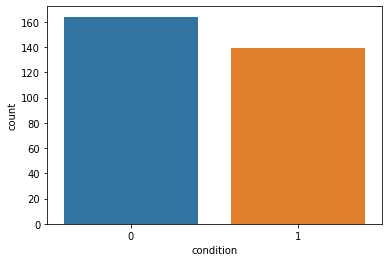

In [ ]:
seaborn.countplot(x = 'condition', data = heart_df)
print('Total patients: ', heart_df.shape[0])

In [ ]:
heart_df.head(20)

,age,sex_male,cp,restbps,chol,fbs,rester,maxhr,eia,oldpeak,slope,majves,thal,condition
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,38,1,3,138,175,0,0,173,0,0.0,1,0,3,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
7,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1
8,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
9,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1


In [ ]:
heart_df = heart_df/heart_df.max()
heart_df.head(20)

,age,sex_male,cp,restbps,chol,fbs,rester,maxhr,eia,oldpeak,slope,majves,thal,condition
0,0.818182,1.0,0.25,0.725,0.413121,1.0,1.0,0.742574,0.0,0.370968,1.000000,0.000000,0.857143,0.0
1,0.493506,1.0,0.75,0.690,0.310284,0.0,0.0,0.856436,0.0,0.000000,0.333333,0.000000,0.428571,0.0
2,0.870130,1.0,1.00,0.800,0.507092,0.0,1.0,0.534653,1.0,0.241935,0.666667,1.000000,0.428571,1.0
3,0.870130,1.0,1.00,0.600,0.406028,0.0,1.0,0.638614,1.0,0.419355,0.666667,0.666667,1.000000,1.0
4,0.480519,1.0,0.75,0.650,0.443262,0.0,0.0,0.925743,0.0,0.564516,1.000000,0.000000,0.428571,0.0
5,0.532468,0.0,0.50,0.650,0.361702,0.0,1.0,0.851485,0.0,0.225806,0.333333,0.000000,0.428571,0.0
6,0.727273,1.0,0.50,0.600,0.418440,0.0,0.0,0.881188,0.0,0.129032,0.333333,0.000000,0.428571,0.0
7,0.805195,0.0,1.00,0.700,0.475177,0.0,1.0,0.792079,0.0,0.580645,1.000000,0.666667,0.428571,1.0
8,0.740260,0.0,1.00,0.600,0.627660,0.0,0.0,0.806931,1.0,0.096774,0.333333,0.000000,0.428571,0.0
9,0.818182,1.0,1.00,0.650,0.450355,0.0,1.0,0.727723,0.0,0.225806,0.666667,0.333333,1.000000,1.0


In [ ]:
heart_df[["majves", "thal"]] = heart_df[["majves", "thal"]].astype("int")
heart_df[['age','sex_male','cp',	'restbps',	'chol',	'fbs',	'rester',	'maxhr',	'eia',	'oldpeak',	'slope',	'majves',	'thal',	'condition']].dtypes


age          float64
sex_male     float64
cp           float64
restbps      float64
chol         float64
fbs          float64
rester       float64
maxhr        float64
eia          float64
oldpeak      float64
slope        float64
majves         int64
thal           int64
condition    float64
dtype: object

Data preparation
- EDA (Exploratory Data Analysis)

In [ ]:
heart_df.describe()

,age,sex_male,cp,restbps,chol,fbs,rester,maxhr,eia,oldpeak,slope,majves,thal,condition
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.706999,0.679868,0.789604,0.658449,0.437399,0.148515,0.495050,0.740630,0.326733,0.167678,0.533553,0.066007,0.386139,0.458746
std,0.117385,0.467299,0.240031,0.087999,0.091803,0.356198,0.497486,0.113243,0.469794,0.187270,0.205409,0.248704,0.487668,0.499120
min,0.376623,0.000000,0.250000,0.470000,0.223404,0.000000,0.000000,0.351485,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000
25%,0.623377,0.000000,0.750000,0.600000,0.374113,0.000000,0.000000,0.660891,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000
50%,0.727273,1.000000,0.750000,0.650000,0.427305,0.000000,0.500000,0.757426,0.000000,0.129032,0.666667,0.000000,0.000000,0.000000
75%,0.792208,1.000000,1.000000,0.700000,0.487589,0.000000,1.000000,0.821782,1.000000,0.258065,0.666667,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


([<matplotlib.axis.XTick at 0x7f8eccf07f50>,
 [Text(0, 0, 'Female'), Text(0, 0, 'Male')])

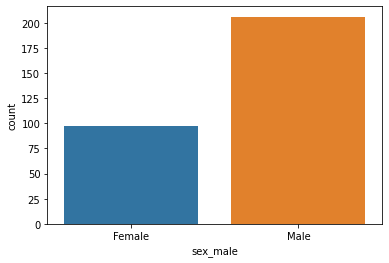

In [ ]:
order = heart_df['sex_male'].value_counts().index
seaborn.countplot(x = 'sex_male',data = heart_df)
pyplot.xticks([0, 1], ['Female', 'Male'])

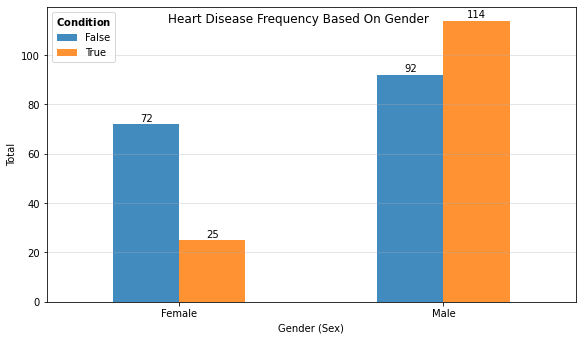

In [ ]:
labels = ['False', 'True']
label_gender = numpy.array([0, 1])
label_gender2 = ['Female', 'Male']

# --- Creating Bar Chart ---
ax = pandas.crosstab(heart_df.sex_male, heart_df.condition).plot(kind = 'bar', 
    figsize = (8, 5), alpha = 0.85)

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, 
             rect.get_height() + 1.25,rect.get_height(), 
             horizontalalignment = 'center', fontsize = 10)

pyplot.suptitle('Heart Disease Frequency Based On Gender')
pyplot.tight_layout(rect=[0, 0.04, 1, 1.025])
pyplot.xlabel('Gender (Sex)')
pyplot.ylabel('Total')
pyplot.xticks(label_gender, label_gender2, rotation=0)
pyplot.grid(axis='y', alpha=0.4)
pyplot.grid(axis='x', alpha=0)
pyplot.legend(labels=labels, title='$\\bf{Condition}$', loc='upper left', frameon=True);

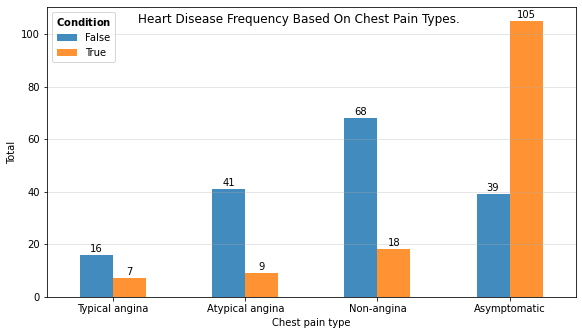

In [ ]:
labels = ['False', 'True']
label_cp = numpy.array([0, 1, 2, 3])
label_cp2 = ['Typical angina', 'Atypical angina', 'Non-angina', 'Asymptomatic']

# --- Creating Bar Chart ---
ax = pandas.crosstab(heart_df.cp, heart_df.condition).plot(kind = 'bar', 
    figsize = (8, 5), alpha = 0.85)

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, 
             rect.get_height() + 1.25,rect.get_height(), 
             horizontalalignment = 'center', fontsize = 10)

pyplot.suptitle('Heart Disease Frequency Based On Chest Pain Types.')
pyplot.tight_layout(rect=[0, 0.04, 1, 1.025])
pyplot.xlabel('Chest pain type')
pyplot.ylabel('Total')
pyplot.xticks(label_cp, label_cp2, rotation=0)
pyplot.grid(axis='y', alpha=0.4)
pyplot.grid(axis='x', alpha=0)
pyplot.legend(labels=labels, title='$\\bf{Condition}$', loc='upper left', frameon=True);
pyplot.show()

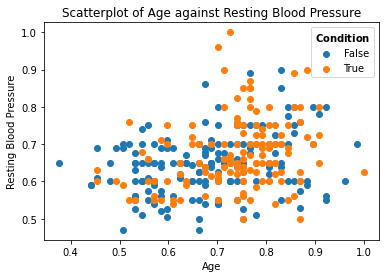

In [ ]:
x = heart_df.age[heart_df.condition==0]
y = heart_df.restbps[(heart_df.condition==0)]
pyplot.scatter(x, y)

x = heart_df.age[heart_df.condition==1]
y = heart_df.restbps[(heart_df.condition==1)]
pyplot.scatter(x, y)

pyplot.title("Scatterplot of Age against Resting Blood Pressure")
pyplot.xlabel('Age')
pyplot.ylabel('Resting Blood Pressure')
pyplot.legend(['False', 'True'], 
              title='$\\bf{Condition}$', loc='upper right', frameon=True);
pyplot.show()

Text(0.5, 1.0, 'Heatmap of Numerical Variables')

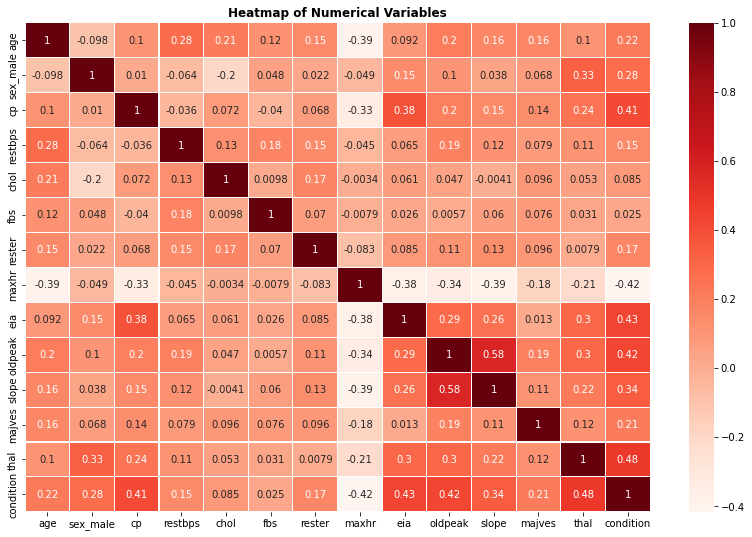

In [ ]:
pyplot.figure(figsize=(14, 9))
seaborn.heatmap(heart_df.corr(), annot=True, cmap='Reds', linewidths=0.1)
pyplot.title('Heatmap of Numerical Variables', fontweight='heavy')

Modelling

In [ ]:
import sklearn
x = heart_df.iloc[:,:-1]
y = heart_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=4)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
sklearn.metrics.accuracy_score(y_pred,y_test)

0.8351648351648352

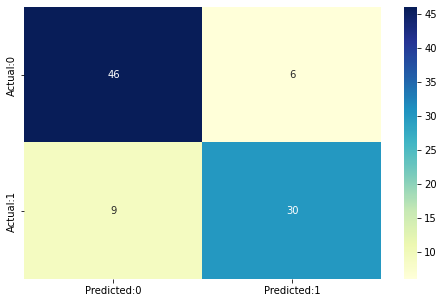

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pandas.DataFrame(
  data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
pyplot.figure(figsize = (8,5))
seaborn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

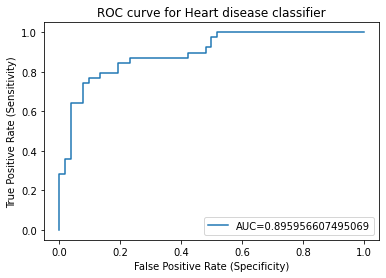

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve
#define metrics
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
pyplot.plot(fpr,tpr, label="AUC="+str(auc))
pyplot.title('ROC curve for Heart disease classifier')
pyplot.ylabel('True Positive Rate (Sensitivity)')
pyplot.xlabel('False Positive Rate (Specificity)')
pyplot.legend(loc=4)
pyplot.show()

GNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(x_train, y_train)

y_pred_GNB = GNBclassifier.predict(x_test)

In [ ]:
sklearn.metrics.accuracy_score(y_pred_GNB, y_test)

0.8241758241758241

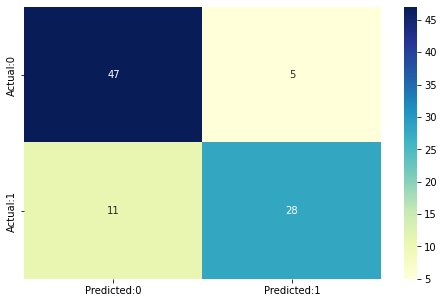

In [ ]:
cm=confusion_matrix(y_test,y_pred_GNB)
conf_matrix=pandas.DataFrame(data=cm,
    columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
pyplot.figure(figsize = (8,5))
seaborn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

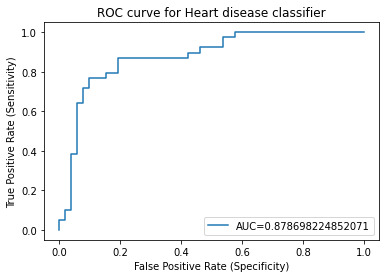

In [ ]:
#define metrics
y_pred_proba = GNBclassifier.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
pyplot.plot(fpr,tpr, label="AUC="+str(auc))
pyplot.title('ROC curve for Heart disease classifier')
pyplot.ylabel('True Positive Rate (Sensitivity)')
pyplot.xlabel('False Positive Rate (Specificity)')
pyplot.legend(loc=4)
pyplot.show()

Evaluation

In [ ]:
# Evaluation of Logistic Regression classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86        52
         1.0       0.83      0.77      0.80        39

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [ ]:
# Evaluation of Gaussion Naive Bayes classifier
print(classification_report(y_pred_GNB, y_test))

              precision    recall  f1-score   support

         0.0       0.90      0.81      0.85        58
         1.0       0.72      0.85      0.78        33

    accuracy                           0.82        91
   macro avg       0.81      0.83      0.82        91
weighted avg       0.84      0.82      0.83        91

